In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv', sep=',')

In [ ]:
X=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = MinMaxScaler()
X= sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#define the keras model
model = Sequential()
model.add(Dense(12,input_dim=8, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=50,batch_size=20)

Epoch 1/50
31/31 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.6221
Epoch 2/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6417
Epoch 3/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6401
Epoch 4/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6401
Epoch 5/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6401
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6417
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.6417
Epoch 8/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.6433
Epoch 9/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6466
Epoch 10/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.6629
Epoch 11/50
31/31 [

In [ ]:
accuracy=history.history['accuracy']
loss=history.history['loss']

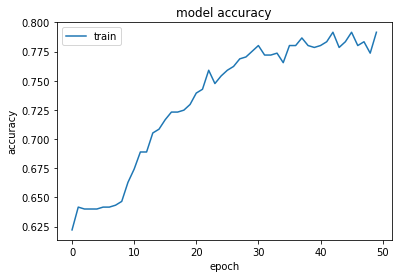

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot for Training and Validation accuracy
from matplotlib import pyplot as plt
plt.plot(history.history ['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

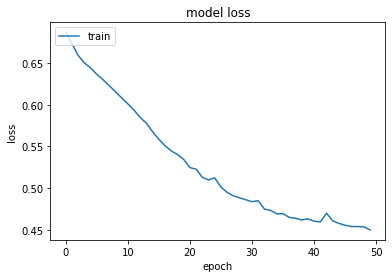

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot for training loss
plt.plot(history.history ['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.7857


In [ ]:
history_test

[0.4372215270996094, 0.7857142686843872]